In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/home/ubuntu/DEEP_LEARNING/AZ_DeepLearning/data')

from sklearn.preprocessing import MinMaxScaler 

In [2]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor=Sequential()

/home/ubuntu/Spell_Correction/Spell_Corrections/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
Train=pd.read_csv('Google_Stock_Price_Train.csv')
print(Train.shape)
print(Train.columns)
display(Train.info())
Train.head()

(1258, 6)
Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.0+ KB


None

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set=Train.iloc[:,1:2].values
print(training_set.shape)
training_set

(1258, 1)


array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
print(training_set_scaled.shape)
training_set_scaled

(1258, 1)


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
X_train=[]
y_train=[]

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [7]:
print(X_train.shape)
X_train

(1198, 60)


array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [8]:
print(y_train.shape)
y_train

(1198,)


array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [9]:
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)
X_train

(1198, 60, 1)


array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [10]:
#First
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
#Second
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#Third
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#Fourth
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
regressor.fit(X_train,y_train, epochs=120, batch_size=32)

Epoch 1/120
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0499
Epoch 2/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0058
Epoch 3/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0051
Epoch 4/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0055
Epoch 5/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0055
Epoch 6/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0044
Epoch 7/120
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0046
Epoch 8/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0043
Epoch 9/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0049
Epoch 10/120
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0043
Epoch 11/120
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0047
Epoch 12/120
1198/1198 [==============================] - 11

In [13]:
Test=pd.read_csv('Google_Stock_Price_Test.csv')
print(Test.shape)
print(Test.columns)
display(Test.info())
Test.head()

(20, 6)
Index([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Date      20 non-null object
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null object
dtypes: float64(4), object(2)
memory usage: 1.0+ KB


None

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [14]:
testing_set=Test.iloc[:,1:2].values
print(testing_set.shape)
testing_set

(20, 1)


array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [15]:
dataset_total=pd.concat([Train['Open'],Test['Open']],axis=0)

In [16]:
inputs=dataset_total[len(dataset_total)-len(Test)-60:].values
print(inputs.shape)
inputs=inputs.reshape(-1,1)
print(inputs.shape)
inputs=sc.transform(inputs)

(80,)
(80, 1)


In [17]:
X_test=[]
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)
X_test

(20, 60, 1)


array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [18]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[775.2231 ],
       [772.18915],
       [774.9101 ],
       [777.51953],
       [781.84937],
       [789.0542 ],
       [793.6844 ],
       [793.16534],
       [792.20624],
       [792.5058 ],
       [793.4349 ],
       [793.7895 ],
       [793.5865 ],
       [794.2139 ],
       [795.089  ],
       [802.07214],
       [810.6573 ],
       [817.8814 ],
       [818.70325],
       [808.2733 ]], dtype=float32)

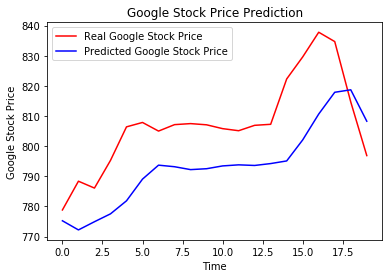

In [19]:
plt.plot(testing_set,color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [20]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(testing_set, predicted_stock_price))
print('Root Mean Suqred Error: {}'.format(round(rmse,2)))

Root Mean Suqred Error: 16.93
